IMPORT OF ALL THE NECESSARY MODULES 

In [228]:
#import wymaganych modułów
import os, shutil, sys
from keras import layers, models, optimizers
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt 
from keras.callbacks import callbacks, EarlyStopping, ModelCheckpoint
import seaborn as sns
import numpy as np

REORGANIZATION OF DATA TO OBTAIN 3 CATEGORIES 

In [57]:
original_dataset_dir = '/Users/Qboszka/Desktop/chest_xray'

In [58]:
base_dir = '/Users/Qboszka/Desktop/chest_xray_final'
os.mkdir(base_dir)

In [59]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [60]:
train_normal_dir = os.path.join(train_dir, 'normal')
os.mkdir(train_normal_dir)

train_bacteria_dir = os.path.join(train_dir, 'bacteria')
os.mkdir(train_bacteria_dir)

train_virus_dir = os.path.join(train_dir, 'virus')
os.mkdir(train_virus_dir)

validation_normal_dir = os.path.join(validation_dir, 'normal')
os.mkdir(validation_normal_dir)

validation_bacteria_dir = os.path.join(validation_dir, 'bacteria')
os.mkdir(validation_bacteria_dir)

validation_virus_dir = os.path.join(validation_dir, 'virus')
os.mkdir(validation_virus_dir)

test_normal_dir = os.path.join(test_dir, 'normal')
os.mkdir(test_normal_dir)

test_bacteria_dir = os.path.join(test_dir, 'bacteria')
os.mkdir(test_bacteria_dir)

test_virus_dir = os.path.join(test_dir, 'virus')
os.mkdir(test_virus_dir)

In [61]:
train_normal_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/train/NORMAL')
for train_normal_image in train_normal_images:
    src = '/Users/Qboszka/Desktop/chest_xray/train/NORMAL/' + train_normal_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/train/normal/' + train_normal_image
    shutil.copyfile(src,dst)

In [62]:
train_backteria_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/train/PNEUMONIA')
for train_backteria_image in train_backteria_images:
    src = '/Users/Qboszka/Desktop/chest_xray/train/PNEUMONIA/' + train_backteria_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/train/bacteria/' + train_backteria_image
    if ("bacteria") in train_backteria_image:
        shutil.copyfile(src,dst)

In [63]:
train_virus_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/train/PNEUMONIA')
for train_virus_image in train_virus_images:
    src = '/Users/Qboszka/Desktop/chest_xray/train/PNEUMONIA/' + train_virus_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/train/virus/' + train_virus_image
    if ("virus") in train_virus_image:
        shutil.copyfile(src,dst)

In [64]:
test_normal_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/test/NORMAL')
for test_normal_image in test_normal_images:
    src = '/Users/Qboszka/Desktop/chest_xray/test/NORMAL/' + test_normal_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/test/normal/' + test_normal_image
    shutil.copyfile(src,dst)

In [65]:
test_bacteria_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/test/PNEUMONIA')
for test_bacteria_image in test_bacteria_images:
    src = '/Users/Qboszka/Desktop/chest_xray/test/PNEUMONIA/' + test_bacteria_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/test/bacteria/' + test_bacteria_image
    if ("bacteria") in test_bacteria_image:
        shutil.copyfile(src,dst)

In [66]:
test_virus_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/test/PNEUMONIA')
for test_virus_image in test_virus_images:
    src = '/Users/Qboszka/Desktop/chest_xray/test/PNEUMONIA/' + test_virus_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/test/virus/' + test_virus_image
    if ("virus") in test_virus_image:
        shutil.copyfile(src,dst)

In [67]:
validation_normal_images = os.listdir('/Users/Qboszka/Desktop/chest_xray_final/test/normal')
for validation_normal_image in validation_normal_images:
    src = '/Users/Qboszka/Desktop/chest_xray_final/test/normal/' + validation_normal_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/validation/normal/' + validation_normal_image
    if len(os.listdir(validation_normal_dir)) <= 29:
        shutil.move(src,dst)

In [68]:
validation_bacteria_images = os.listdir('/Users/Qboszka/Desktop/chest_xray_final/test/bacteria')
for valdiation_bacteria_image in validation_bacteria_images:
    src = '/Users/Qboszka/Desktop/chest_xray_final/test/bacteria/' + valdiation_bacteria_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/validation/bacteria/' + valdiation_bacteria_image
    if len(os.listdir(validation_bacteria_dir)) <= 29:
        shutil.move(src,dst)

In [69]:
validation_virus_images = os.listdir('/Users/Qboszka/Desktop/chest_xray_final/test/virus')
for validation_virus_image in validation_virus_images:
    src = '/Users/Qboszka/Desktop/chest_xray_final/test/virus/' + validation_virus_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/validation/virus/' + validation_virus_image
    if len(os.listdir(validation_virus_dir)) <= 29:
        shutil.move(src,dst)

In [70]:
print(os.listdir('/Users/Qboszka/Desktop/chest_xray/train'))
print(os.listdir('/Users/Qboszka/Desktop/chest_xray_final/train'))

['.DS_Store', 'PNEUMONIA', 'NORMAL']
['normal', 'bacteria', 'virus']


DATA BALANCE BAR PLOTS

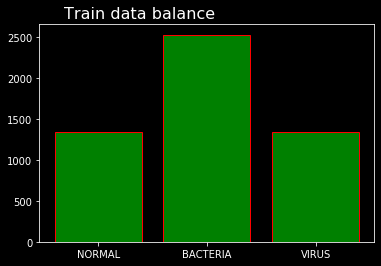

In [256]:
normal_count = (len(os.listdir(train_normal_dir)))
bacteria_count = (len(os.listdir(train_bacteria_dir)))
virus_count = (len(os.listdir(train_virus_dir)))

plt.figure()
bars = ('NORMAL', 'BACTERIA', 'VIRUS')
height = [normal_count, bacteria_count, virus_count]
plt.bar(np.arange(len(bars)), height, color='g', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Train data balance', x = 0.3, y = 1,fontsize = 16)
plt.show()

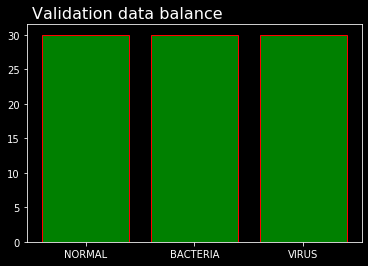

In [257]:
normal_count = (len(os.listdir(validation_normal_dir)))
bacteria_count = (len(os.listdir(validation_bacteria_dir)))
virus_count = (len(os.listdir(validation_virus_dir)))

plt.figure()
bars = ('NORMAL', 'BACTERIA', 'VIRUS')
height = [normal_count, bacteria_count, virus_count]
plt.bar(np.arange(len(bars)), height, color='g', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Validation data balance', x = 0.3, y = 1,fontsize = 16)
plt.show()

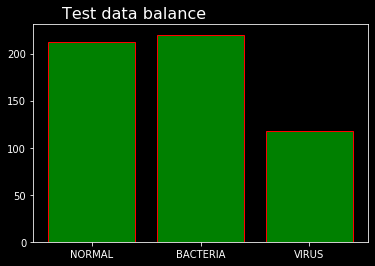

In [258]:
normal_count = (len(os.listdir(test_normal_dir)))
bacteria_count = (len(os.listdir(test_bacteria_dir)))
virus_count = (len(os.listdir(test_virus_dir)))

plt.figure()
bars = ('NORMAL', 'BACTERIA', 'VIRUS')
height = [normal_count, bacteria_count, virus_count]
plt.bar(np.arange(len(bars)), height, color='g', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Test data balance', x = 0.3, y = 1,fontsize = 16)
plt.show()

EXAMPLE IMAGES OF EACH CATEGORY 

NORMAL


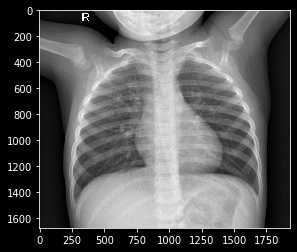

In [170]:
img_normal = 'IM-0243-0001.jpeg'
img_normal = load_img('/Users/Qboszka/Desktop/chest_xray_final/train/normal/' + img_normal)

print('NORMAL')
plt.imshow(img_normal)
plt.show()

BACTERIA


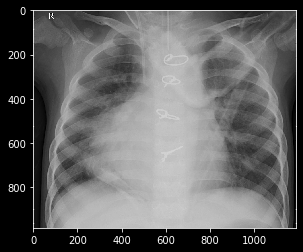

In [169]:
img_bacteria='person55_bacteria_262.jpeg'
img_bacteria=load_img('/Users/Qboszka/Desktop/chest_xray_final/train/bacteria/' + img_bacteria)

print('BACTERIA')
plt.imshow(img_bacteria)
plt.show()

VIRUS


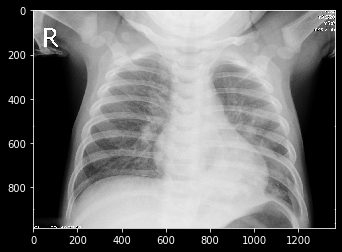

In [166]:
img_virus = 'person151_virus_301.jpeg'
img_virus = load_img('/Users/Qboszka/Desktop/chest_xray_final/train/virus/' + img_virus)

print('VIRUS')
plt.imshow(img_virus)
plt.show()

DATA PREPROCESSING WITHOUT AUGMENTATION

In [95]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

Found 5216 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Found 550 images belonging to 3 classes.


BUILDING CNN MODEL

In [104]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [105]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)      

COMPILING MODEL AND SETTING UP CALLBACKS

In [106]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [108]:
mc = ModelCheckpoint('best_model_history.h5', 
                     monitor='val_acc',
                     mode='max', 
                     save_best_only=True,
                     verbose=1)
cb_list = [mc]

MODEL FITTING 

In [109]:
history = model.fit_generator(
train_generator,
steps_per_epoch=160,
epochs=10,
validation_data=validation_generator,
validation_steps=100,
shuffle=True,
callbacks=cb_list)

Epoch 1/10
160/160 [==============================] - 193s 1s/step - loss: 0.8562 - acc: 0.6053 - val_loss: 0.6512 - val_acc: 0.7891

Epoch 00001: val_acc improved from -inf to 0.78914, saving model to best_model_history.h5
Epoch 2/10
160/160 [==============================] - 200s 1s/step - loss: 0.5703 - acc: 0.7490 - val_loss: 0.5398 - val_acc: 0.7778

Epoch 00002: val_acc did not improve from 0.78914
Epoch 3/10
160/160 [==============================] - 178s 1s/step - loss: 0.5253 - acc: 0.7775 - val_loss: 0.8015 - val_acc: 0.7213

Epoch 00003: val_acc did not improve from 0.78914
Epoch 4/10
160/160 [==============================] - 212s 1s/step - loss: 0.4913 - acc: 0.7867 - val_loss: 1.3809 - val_acc: 0.7002

Epoch 00004: val_acc did not improve from 0.78914
Epoch 5/10
160/160 [==============================] - 197s 1s/step - loss: 0.4755 - acc: 0.7877 - val_loss: 0.3972 - val_acc: 0.8115

Epoch 00005: val_acc improved from 0.78914 to 0.81146, saving model to best_model_history.

SAVING AND EVALUATING ONLY THE BEST MODEL

In [140]:
saved_model = load_model('best_model_history.h5')

In [141]:
test_loss, test_accuracy = saved_model.evaluate(test_generator, steps=50)

50/50 [==============================] - 25s 509ms/step


In [142]:
print('Test loss: %4.2f' % (test_loss))
print('Test accuracy: %4.2f' % (test_accuracy))

Test loss: 0.80
Test accuracy: 0.79


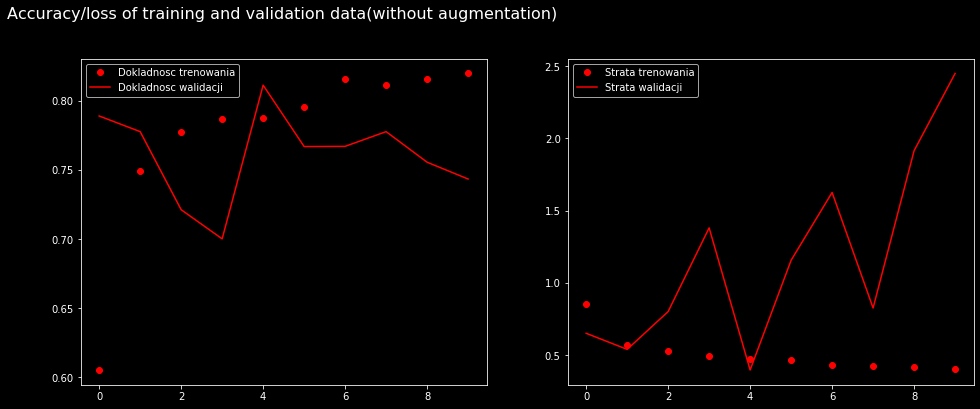

In [200]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.style.use('dark_background')
plt.plot(epochs, acc, 'ro', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'r', label='Dokladnosc walidacji')
plt.legend()

plt.subplot(122)
plt.style.use('dark_background')
plt.plot(epochs, loss, 'ro', label='Strata trenowania')
plt.plot(epochs, val_loss, 'r', label='Strata walidacji')
plt.legend()

plt.suptitle(t = 'Accuracy/loss of training and validation data(without augmentation)', 
             x = 0.3, 
             y = 1, 
             fontsize = 16)
plt.show()

DATA PREPROCESSING WITH AUGMENTATION

In [113]:
train_datagen_aug = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

test_datagen_aug = ImageDataGenerator(rescale = 1./255)

train_generator_aug = train_datagen_aug.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

validation_generator_aug = test_datagen_aug.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

test_generator_aug = test_datagen_aug.flow_from_directory(
test_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

Found 5216 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Found 550 images belonging to 3 classes.


SETTING UP CALLBACKS 

In [121]:
mc = ModelCheckpoint('best_model_history_aug.h5', 
                     monitor='val_acc',
                     mode='max', 
                     save_best_only=True,
                     verbose=1)
cb_list_aug = [mc]

MODEL FITTING WTIH AUGMENTATION APPLIED

In [122]:
history_aug = model.fit_generator(
train_generator_aug,
steps_per_epoch=160,
epochs=10,
validation_data=validation_generator_aug,
validation_steps=100,
shuffle=True,
callbacks=cb_list_aug)

Epoch 1/10
160/160 [==============================] - 255s 2s/step - loss: 0.7047 - acc: 0.6939 - val_loss: 0.7040 - val_acc: 0.7658

Epoch 00001: val_acc improved from -inf to 0.76582, saving model to best_model_history_aug.h5
Epoch 2/10
160/160 [==============================] - 241s 2s/step - loss: 0.7015 - acc: 0.6965 - val_loss: 0.4626 - val_acc: 0.8348

Epoch 00002: val_acc improved from 0.76582 to 0.83478, saving model to best_model_history_aug.h5
Epoch 3/10
160/160 [==============================] - 212s 1s/step - loss: 0.6759 - acc: 0.7078 - val_loss: 0.3537 - val_acc: 0.8548

Epoch 00003: val_acc improved from 0.83478 to 0.85481, saving model to best_model_history_aug.h5
Epoch 4/10
160/160 [==============================] - 201s 1s/step - loss: 0.6704 - acc: 0.7129 - val_loss: 0.3819 - val_acc: 0.8671

Epoch 00004: val_acc improved from 0.85481 to 0.86709, saving model to best_model_history_aug.h5
Epoch 5/10
160/160 [==============================] - 233s 1s/step - loss: 0.66

SAVING AND EVALUATING ONLY BEST MODEL

In [147]:
saved_model_aug = load_model('best_model_history_aug.h5')

In [148]:
test_loss_aug, test_accuracy_aug = saved_model_aug.evaluate(test_generator_aug, steps=50)

50/50 [==============================] - 34s 688ms/step


In [149]:
print('Test loss: %4.2f' % (test_loss_aug))
print('Test accuracy: %4.2f' % (test_accuracy_aug))

Test loss: 0.56
Test accuracy: 0.84


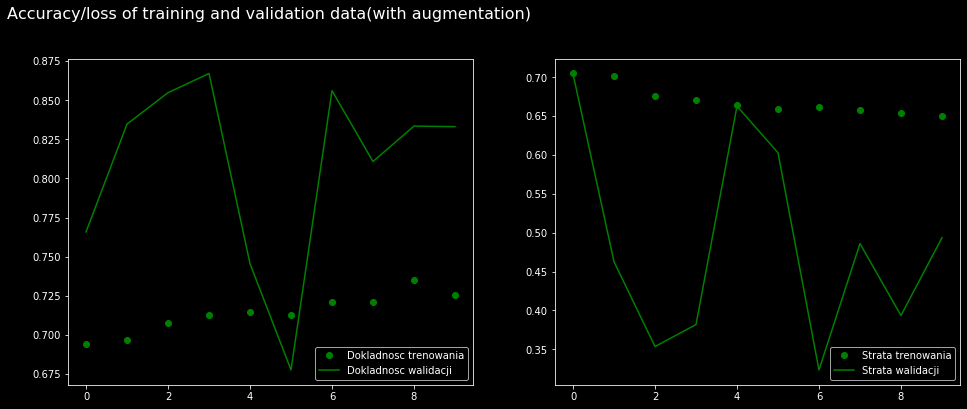

In [212]:
acc = history_aug.history['acc']
val_acc = history_aug.history['val_acc']
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.style.use('dark_background')
plt.plot(epochs, acc, 'go', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'g', label='Dokladnosc walidacji')
plt.legend(loc="lower right")

plt.subplot(122)
plt.style.use('dark_background')
plt.plot(epochs, loss, 'go', label='Strata trenowania')
plt.plot(epochs, val_loss, 'g', label='Strata walidacji')
plt.legend(loc='lower right')

plt.suptitle(t = 'Accuracy/loss of training and validation data(with augmentation)', 
             x = 0.3, 
             y = 1, 
             fontsize = 16)
plt.show()

COMPARISON OF MODELS WITH AND WITHOUT DATA AUGMENTATION APPLIED

In [214]:
print('Test loss: %4.2f' % (test_loss))
print('Test loss (Augmentation): %4.2f' % (test_loss_aug))

Test loss: 0.80
Test loss (Augmentation): 0.56


In [215]:
print('Test accuracy: %4.2f' % (test_accuracy))
print('Test accuracy (Augmentation: %4.2f' % (test_accuracy_aug))

Test accuracy: 0.79
Test accuracy (Augmentation: 0.84


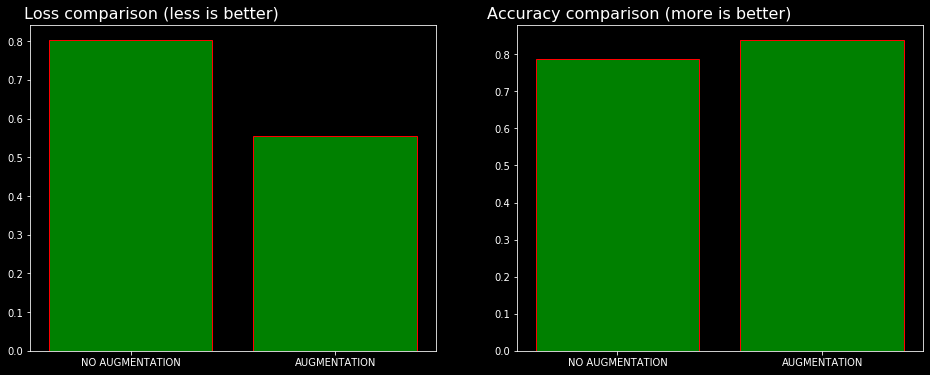

In [272]:
plt.figure(figsize=(16,6))

plt.subplot(121)
bars = ('NO AUGMENTATION', 'AUGMENTATION')
height = [test_loss, test_loss_aug]
plt.bar(np.arange(len(bars)), height, color='g', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Loss comparison (less is better)', x = 0.3, y = 1,fontsize = 16)

plt.subplot(122)
bars = ('NO AUGMENTATION', 'AUGMENTATION')
height = [test_accuracy, test_accuracy_aug]
plt.bar(np.arange(len(bars)), height, color='g', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Accuracy comparison (more is better)', x = 0.3, y = 1,fontsize = 16)
plt.show()